#LGMVIP Data Science Internship task 3 - September

*   **Prediction using Decision tree**






done by P.Abhiram Reddy

In [2]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [20]:
# Loading dataset
df = pd.read_csv("/content/drug_dataset.csv")
df.head()

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,HIGH,25.355,drugY
1,1,47,M,LOW,HIGH,13.093,drugC
2,2,47,M,LOW,HIGH,10.114,drugC
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,drugY


In [21]:
df.shape
df = df.dropna()

In [27]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [22]:
# Encoding the labels
from sklearn import preprocessing
gender_encoder = preprocessing.LabelEncoder()
gender_encoder.fit(['F','M'])
df.iloc[:,2] = gender_encoder.transform(df.iloc[:,2])
BP_encoder = preprocessing.LabelEncoder()
BP_encoder.fit(['HIGH','LOW','NORMAL'])
df.iloc[:,3] = BP_encoder.transform(df.iloc[:,3])
col_encoder = preprocessing.LabelEncoder()
col_encoder.fit(['HIGH','NORMAL'])
df.iloc[:,4] = col_encoder.transform(df.iloc[:,4])
df.drop(columns = ['Unnamed: 0'],inplace = True)
df.head()

<ipython-input-22-e6c4f58b3a4d>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = gender_encoder.transform(df.iloc[:,2])
<ipython-input-22-e6c4f58b3a4d>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,3] = BP_encoder.transform(df.iloc[:,3])
<ipython-input-22-e6c4f58b3a4d>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique,

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


###Visualizing the dataset

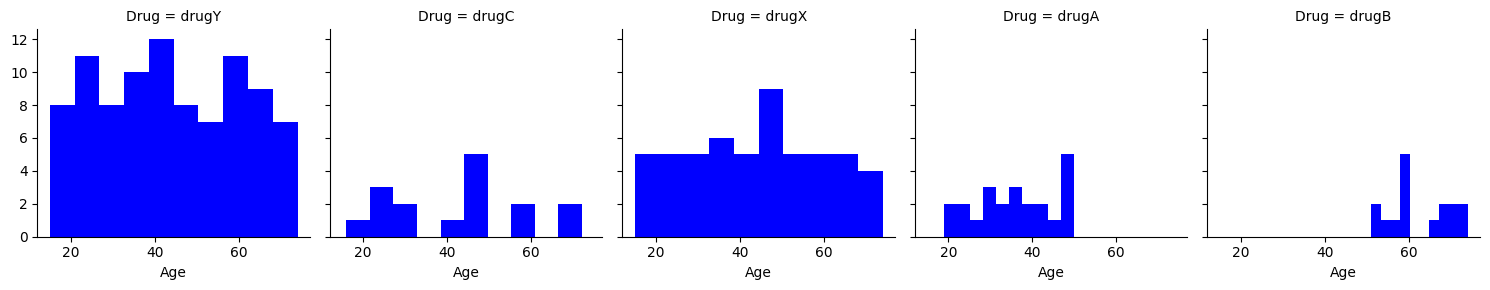

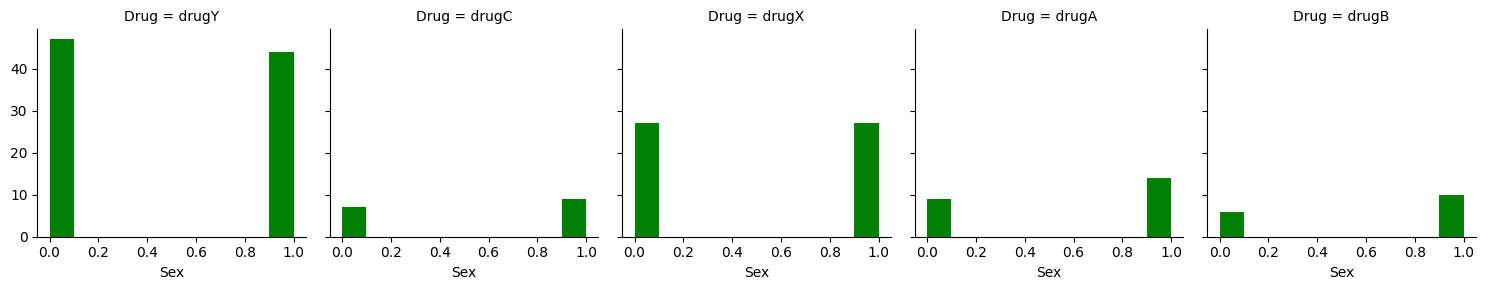

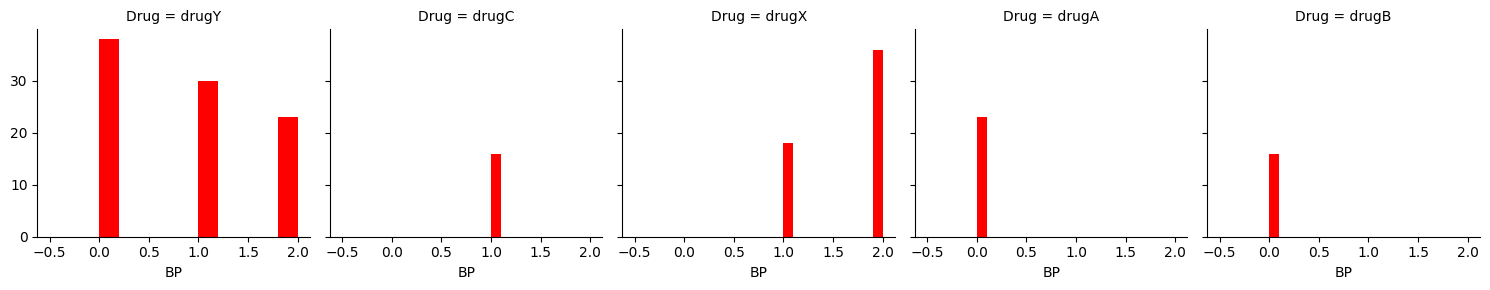

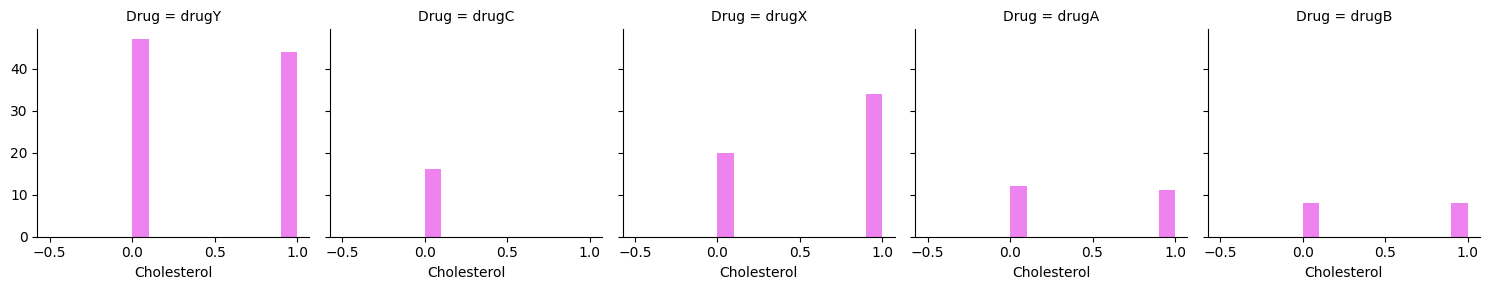

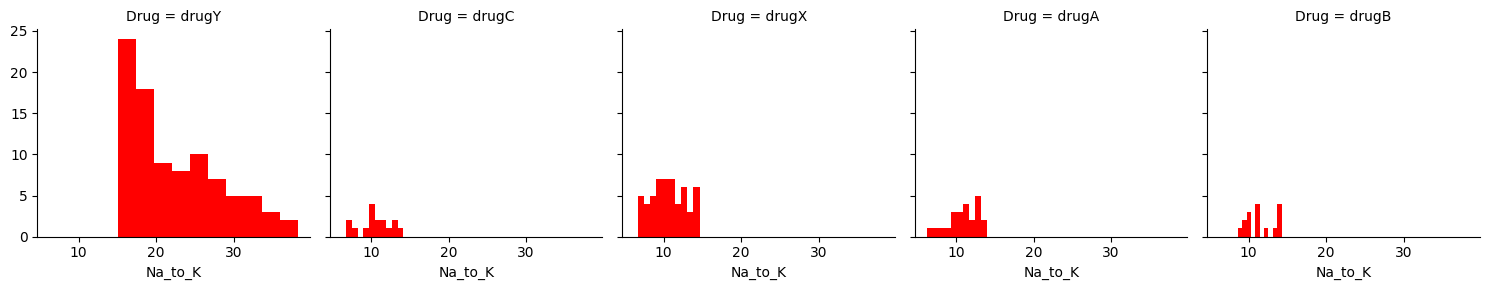

In [10]:
plot = sns.FacetGrid(df,col='Drug',margin_titles=True)
plot.map(plt.hist,'Age',color = 'blue')
plot = sns.FacetGrid(df,col='Drug',margin_titles=True)
plot.map(plt.hist,'Sex',color = 'green')
plot = sns.FacetGrid(df,col='Drug',margin_titles=True)
plot.map(plt.hist,'BP',color = 'red')
plot = sns.FacetGrid(df,col='Drug',margin_titles=True)
plot.map(plt.hist,'Cholesterol',color = 'violet')
plot = sns.FacetGrid(df,col='Drug',margin_titles=True)
plot.map(plt.hist,'Na_to_K',color = 'red')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


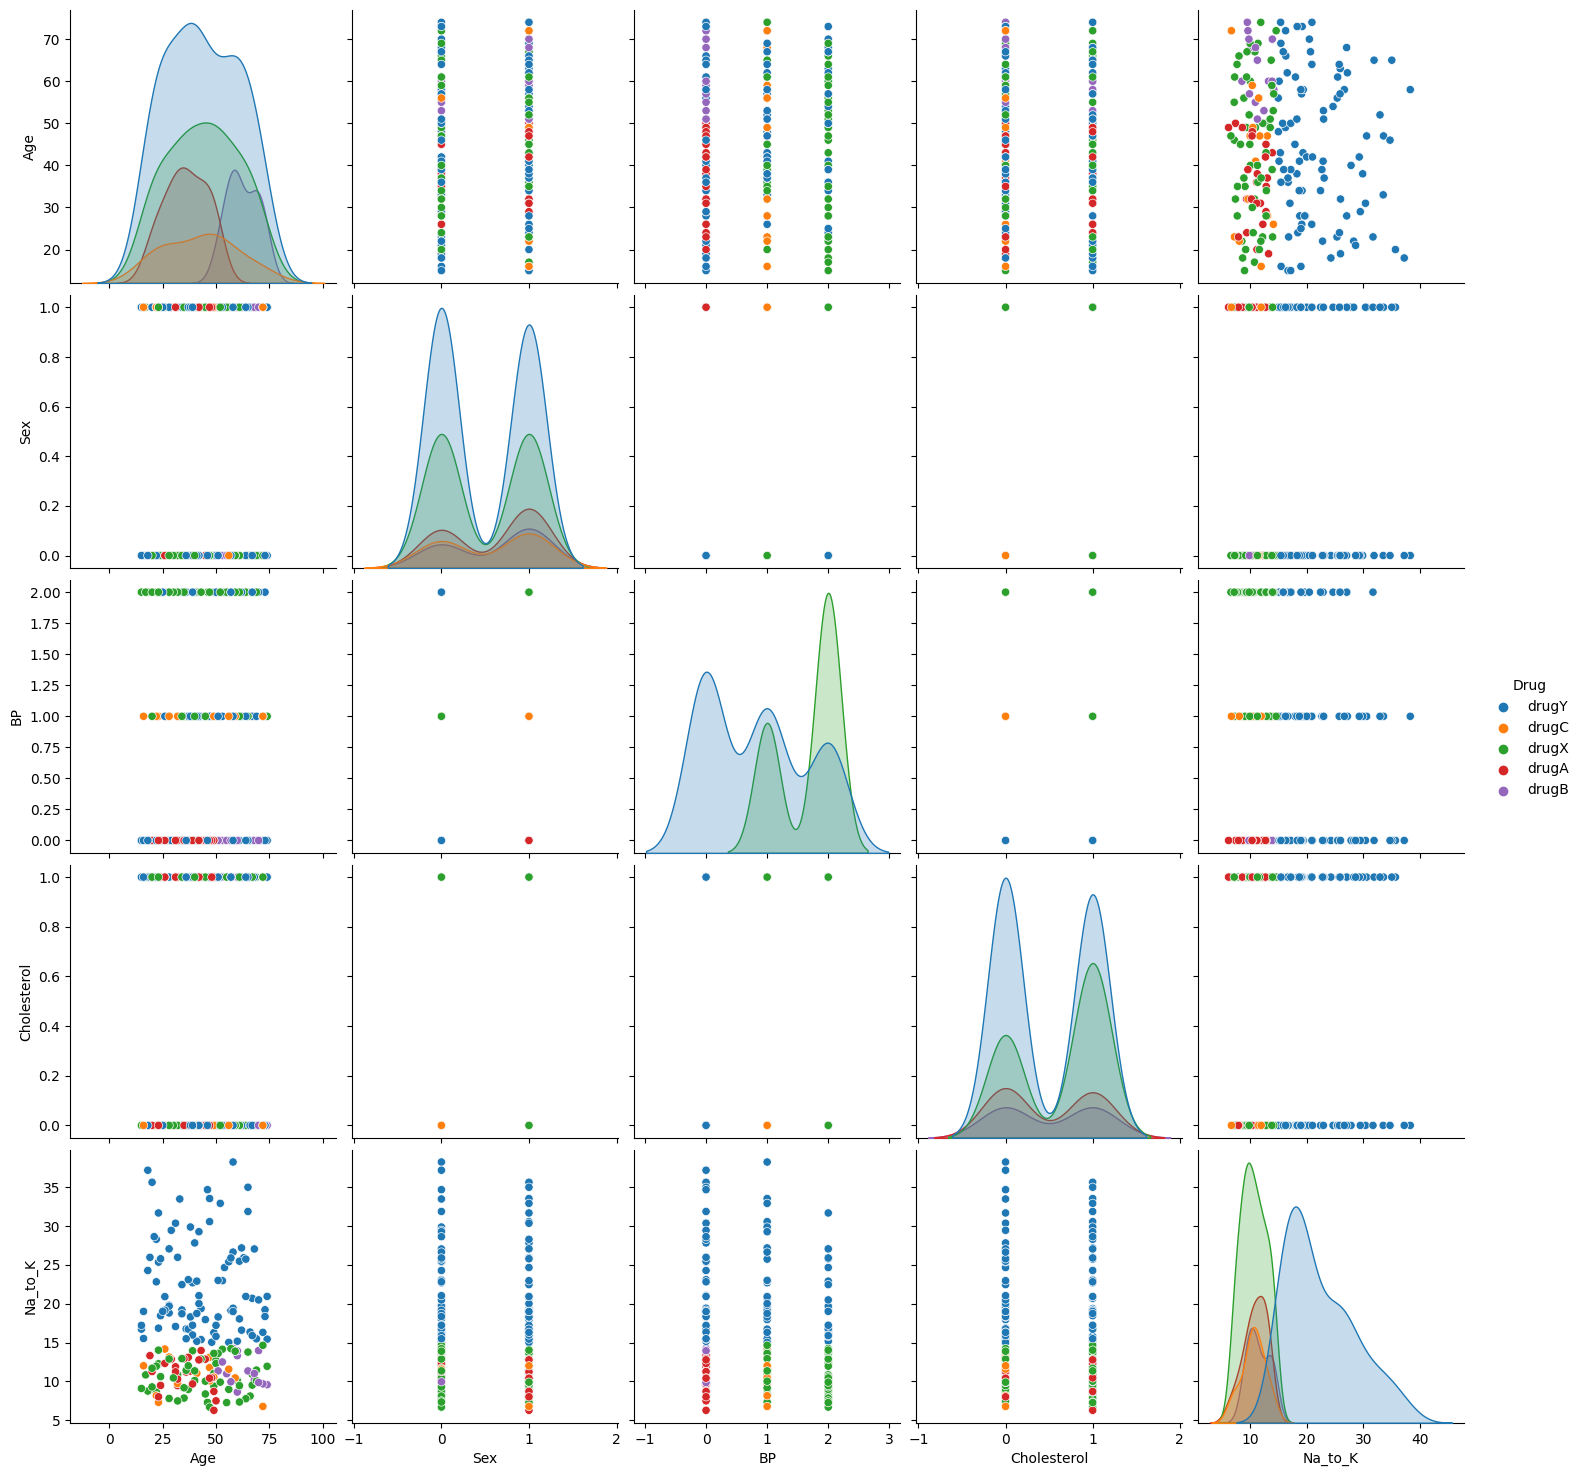

In [23]:
sns.pairplot(df,hue = 'Drug',size = 3)

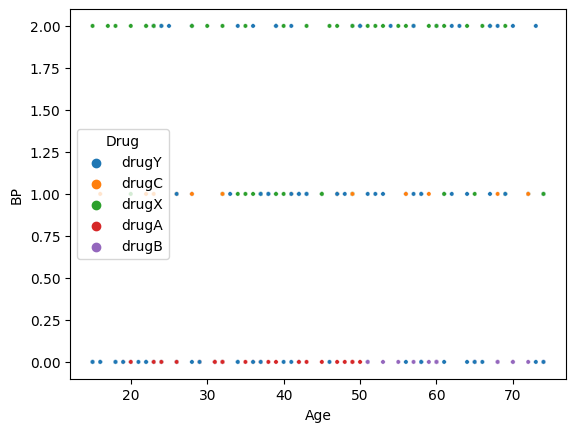

In [25]:

sns.scatterplot(x='Age', y='BP', hue='Drug', data=df,s =10)

plt.show()

In [29]:
mdf = df[['Age','Sex','BP','Cholesterol','Na_to_K','Drug']]
drug_encoder = preprocessing.LabelEncoder()
drug_encoder.fit(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'])
mdf.iloc[:,5] = drug_encoder.transform(mdf.iloc[:,5])

<ipython-input-29-8770192f621f>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  mdf.iloc[:,5] = drug_encoder.transform(mdf.iloc[:,5])


<Axes: title={'center': 'Pearson Correlation of Features'}>

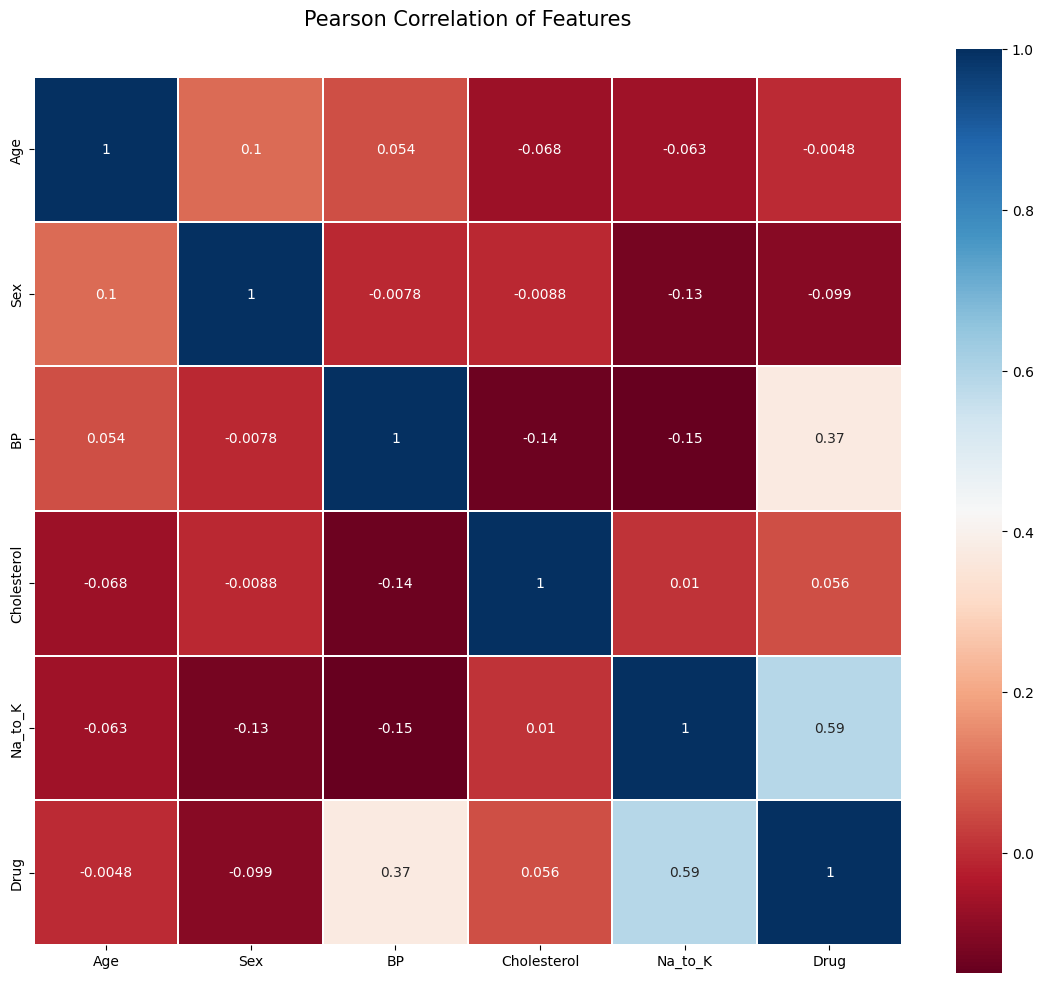

In [30]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(mdf.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

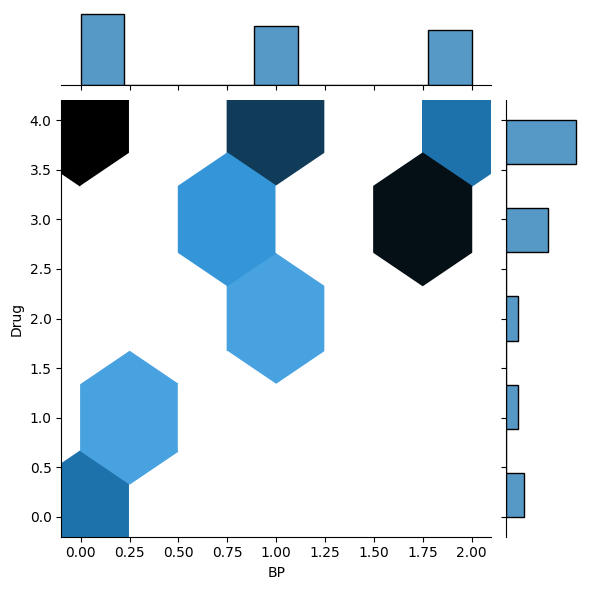

In [32]:
sns.jointplot(x = mdf['BP'],y = mdf['Drug'],kind = 'hex')
plt.show()

####Extracting the Features

In [33]:
x = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = df[['Drug']].values

In [34]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
dtc = dtc.fit(x,y)

In [35]:
yhat = dtc.predict(x)

In [36]:
from sklearn.metrics import f1_score
f1_score(y, yhat, average='weighted')

1.0

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [23, 16, 16, 54, 91]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.667\nsamples = 109\nvalue = [23, 16, 16, 54, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [23, 16, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 16, 54, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 16, 18, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 18, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 36, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 91\nvalue = [0, 0, 0, 0, 91]')]

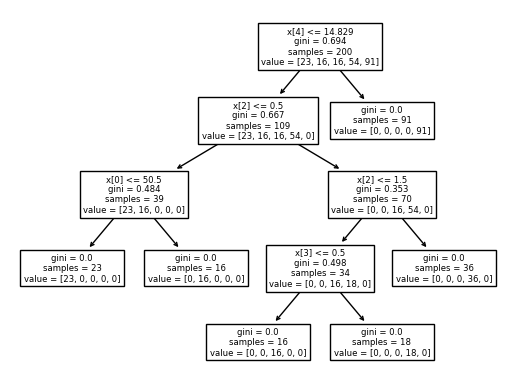

In [37]:
tree.plot_tree(dtc)

##Visualizing Graphically

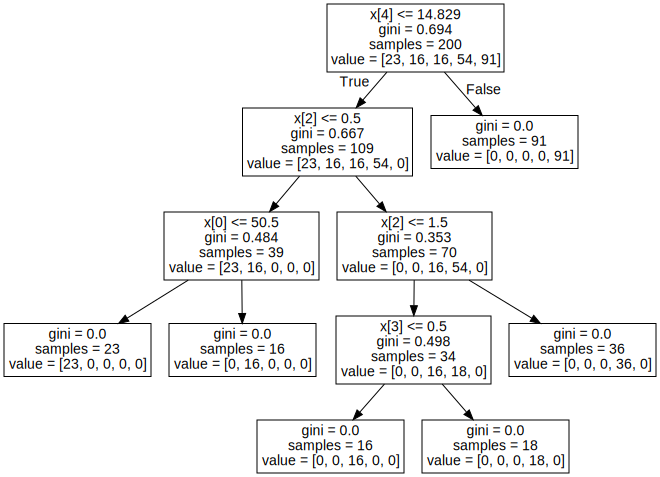

In [38]:
dot_data = tree.export_graphviz(dtc, out_file=None)

graph = graphviz.Source(dot_data)
graph